### Import Dataset 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
train = pd.read_csv(r"C:\Users\SONY\Desktop\projects of Machine Learning\Tweets\Tweets.csv")

### Exploratory Data Analysis 

In [3]:
train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
train.shape

(14640, 15)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


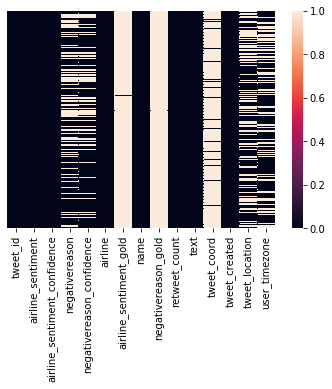

In [6]:
sns.heatmap(train.isnull(), yticklabels= False)

In [7]:
train.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
#As if missing data is more than 90% then better to drop this table. it will not affect data. 

In [9]:
col_drop = ['airline_sentiment_gold','negativereason_gold','tweet_coord']
for col in col_drop:
    del train[col]

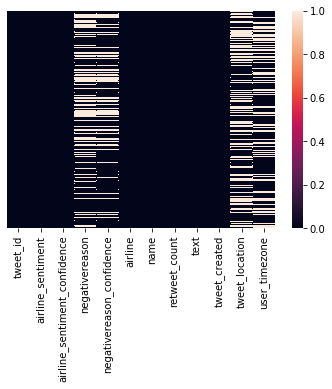

In [10]:
sns.heatmap(train.isnull(), yticklabels= False)

### Data Visualization

In [11]:
train.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

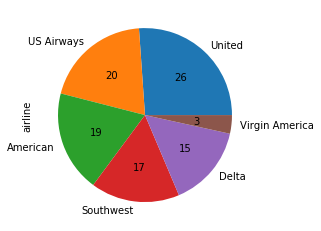

In [12]:
train.airline.value_counts().plot(kind = 'pie',autopct = '%1.0f')

In [13]:
train.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

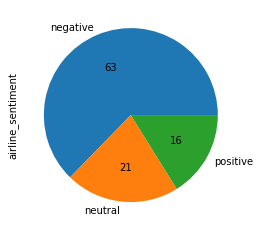

In [14]:

train.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f')

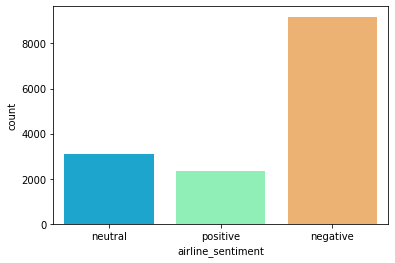

In [15]:
sns.countplot(x='airline_sentiment',data=train,palette='rainbow')

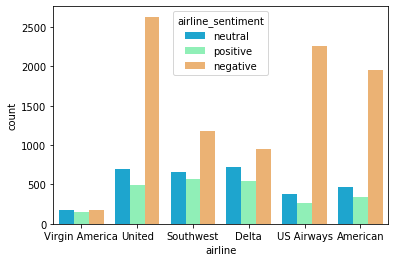

In [16]:
sns.countplot(x='airline', hue = 'airline_sentiment',data=train,palette='rainbow')

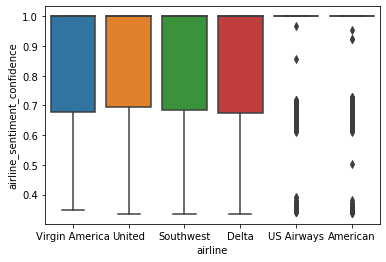

In [17]:
sns.boxplot(x='airline',y='airline_sentiment_confidence',data=train)

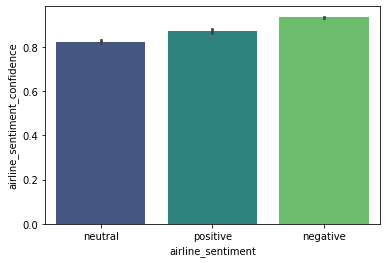

In [18]:
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence',data=train,palette='viridis')

In [19]:
train['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [20]:
airline_list = list(train['airline'].unique())

Index(['negative', 'neutral', 'positive'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['negative', 'neutral', 'positive'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['negative', 'neutral', 'positive'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['negative', 'neutral', 'positive'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['negative', 'neutral', 'positive'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
Index(['negative', 'neutral', 'positive'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


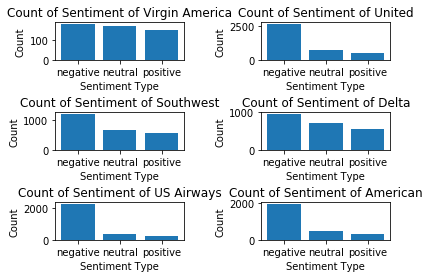

In [21]:
for i in range(6):
    plt.subplot(3,2,i+1)
    df = train[train['airline']== airline_list[i]]
    y =df['airline_sentiment'].value_counts()
    x = y.index
    print(x)
    print(type(x))
    plt.bar(x,y)
    plt.ylabel('Count')
    plt.xlabel('Sentiment Type')
    plt.title('Count of Sentiment of '+airline_list[i])
plt.subplots_adjust(wspace=0.6,hspace=1.4)
plt.show()

Index(['Customer Service Issue', 'Flight Booking Problems', 'Can't Tell',
       'Bad Flight', 'Cancelled Flight', 'Late Flight',
       'Flight Attendant Complaints', 'Lost Luggage', 'Damaged Luggage',
       'longlines'],
      dtype='object')


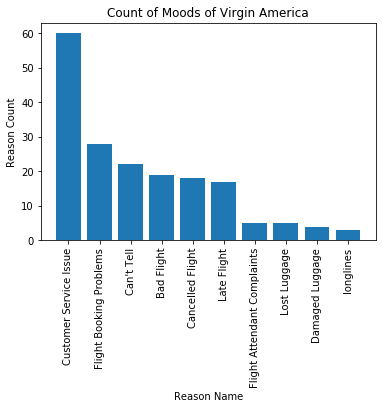

Index(['Customer Service Issue', 'Late Flight', 'Can't Tell', 'Lost Luggage',
       'Bad Flight', 'Cancelled Flight', 'Flight Attendant Complaints',
       'Flight Booking Problems', 'longlines', 'Damaged Luggage'],
      dtype='object')


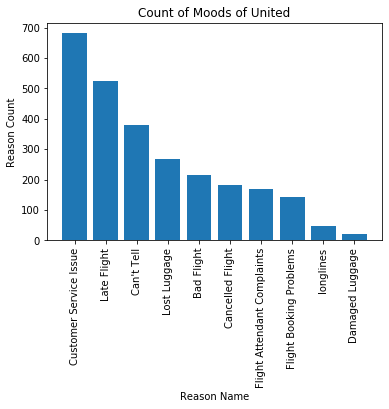

Index(['Customer Service Issue', 'Cancelled Flight', 'Can't Tell',
       'Late Flight', 'Lost Luggage', 'Bad Flight', 'Flight Booking Problems',
       'Flight Attendant Complaints', 'longlines', 'Damaged Luggage'],
      dtype='object')


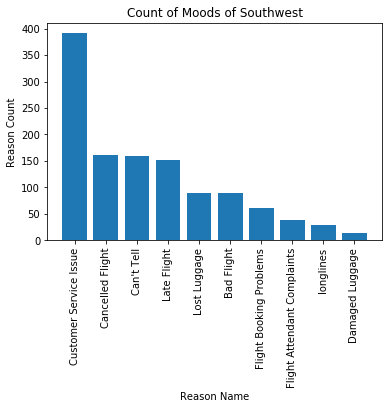

Index(['Late Flight', 'Customer Service Issue', 'Can't Tell', 'Bad Flight',
       'Flight Attendant Complaints', 'Lost Luggage', 'Cancelled Flight',
       'Flight Booking Problems', 'longlines', 'Damaged Luggage'],
      dtype='object')


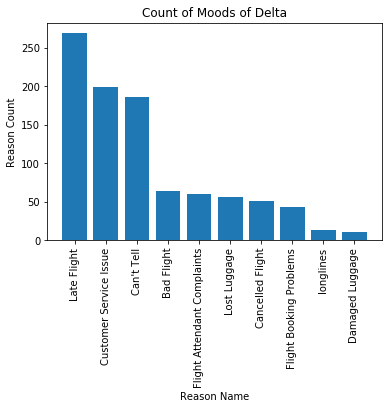

Index(['Customer Service Issue', 'Late Flight', 'Can't Tell',
       'Cancelled Flight', 'Lost Luggage', 'Flight Attendant Complaints',
       'Flight Booking Problems', 'Bad Flight', 'longlines',
       'Damaged Luggage'],
      dtype='object')


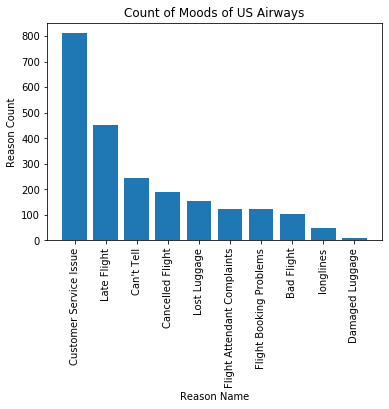

Index(['Customer Service Issue', 'Late Flight', 'Cancelled Flight',
       'Can't Tell', 'Lost Luggage', 'Flight Booking Problems', 'Bad Flight',
       'Flight Attendant Complaints', 'longlines', 'Damaged Luggage'],
      dtype='object')


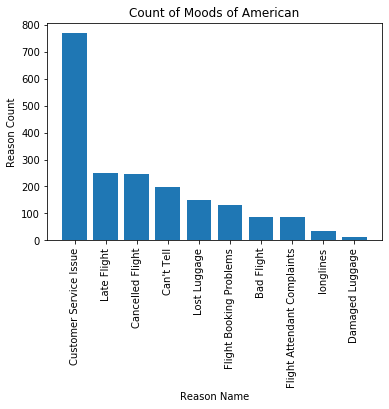

In [22]:
#plotting negative reasons
for i in range(6):
    df = train[train['airline']==airline_list[i]]
    y = df['negativereason'].value_counts()
    x = y.index
    print(x)
    plt.bar(x,y)
    plt.ylabel('Reason Count')
    plt.xlabel('Reason Name')
    plt.xticks(x,rotation=90)
    plt.title('Count of Moods of '+airline_list[i])
    plt.show()

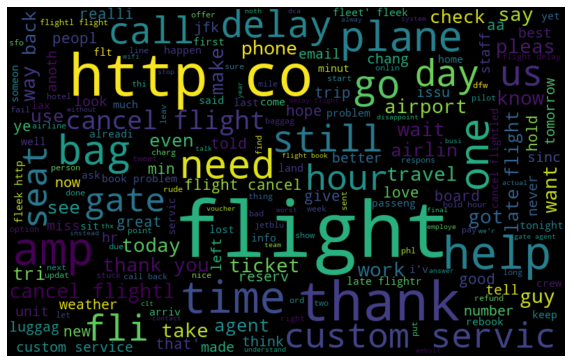

In [23]:
#importing another library
from wordcloud import WordCloud
#for all words
corpus = []
text_series = train['text']
for i in text_series.index:
    text = text_series[i].lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    text = re.sub('@[a-zA-Z]+','', text)
    corpus.append(text)
    
all_words = ' '.join([word for word in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

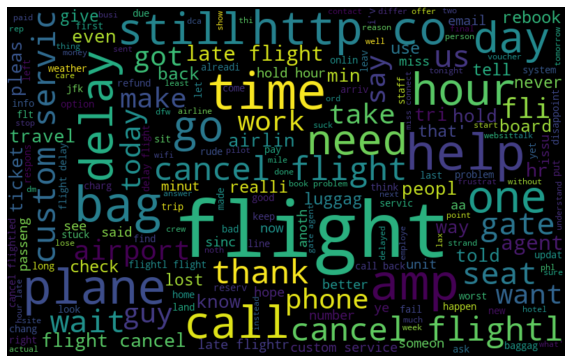

In [24]:
corpus1 = []
text_series1 = train[train['airline_sentiment']=='negative']['text']
for i in text_series1.index:
    text = text_series1[i].lower()
    text = text.split()  
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    text = re.sub('@[a-zA-Z]+','', text)
    corpus1.append(text)
    
all_words1 = ' '.join([word for word in corpus1])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Model Evaluation 

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
print(X)
y = train.iloc[:, 1].values
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [27]:
X_train

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
y_train

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [30]:
y_test

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

## GaussianNB

In [57]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
predictions_GNB = classifier.predict(X_test)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score
cm = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='micro')

In [59]:
print(f1_score)

0.38831967213114754


In [60]:
acc_GNB = ('accuracy score',accuracy_score(y_test,predictions_GNB))
acc_GNB

('accuracy score', 0.38831967213114754)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_GNB))

              precision    recall  f1-score   support

    negative       0.92      0.30      0.45      1870
     neutral       0.28      0.30      0.29       614
    positive       0.23      0.88      0.37       444

    accuracy                           0.39      2928
   macro avg       0.48      0.49      0.37      2928
weighted avg       0.68      0.39      0.41      2928



## Random Forest Classifier 

In [62]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200,random_state=0)
text_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [63]:
predictions_RF = text_classifier.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predictions_RF))

[[1661  141   68]
 [ 260  285   69]
 [ 119   58  267]]


In [65]:
acc_RF = ('accuracy score',accuracy_score(y_test,predictions))
acc_RF

('accuracy score', 0.7564890710382514)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_RF))

              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      1870
     neutral       0.59      0.46      0.52       614
    positive       0.66      0.60      0.63       444

    accuracy                           0.76      2928
   macro avg       0.69      0.65      0.67      2928
weighted avg       0.74      0.76      0.75      2928



## SVM 

In [67]:
from sklearn.svm import SVC

In [68]:
svm = SVC(kernel='linear',random_state=1)
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [69]:
predictions_SVM = svm.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predictions_SVM))

[[1577  221   72]
 [ 216  336   62]
 [  94   69  281]]


In [71]:
acc_SVM = ('accuracy score',accuracy_score(y_test,predictions))
acc_SVM

('accuracy score', 0.7564890710382514)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      1870
     neutral       0.54      0.55      0.54       614
    positive       0.68      0.63      0.65       444

    accuracy                           0.75      2928
   macro avg       0.68      0.67      0.68      2928
weighted avg       0.75      0.75      0.75      2928



## MultinomialNB 

In [73]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
predictions_MNB = classifier.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,predictions_MNB))

[[1616  176   78]
 [ 254  305   55]
 [ 107   43  294]]


In [77]:
acc_MNB = ('accuracy score',accuracy_score(y_test,predictions))
acc_MNB

('accuracy score', 0.7564890710382514)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_MNB))

              precision    recall  f1-score   support

    negative       0.82      0.86      0.84      1870
     neutral       0.58      0.50      0.54       614
    positive       0.69      0.66      0.68       444

    accuracy                           0.76      2928
   macro avg       0.70      0.67      0.68      2928
weighted avg       0.75      0.76      0.75      2928



## Comparing Models

In [80]:
models = pd.DataFrame({
    'Model': ['GaussianNB','Random Forest','Support Vector Machines', 'MultinomialNB'],
    
    'Score': [acc_GNB, acc_RF, acc_SVM, acc_MNB]})

In [81]:
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,"(accuracy score, 0.7564890710382514)"
2,Support Vector Machines,"(accuracy score, 0.7564890710382514)"
3,MultinomialNB,"(accuracy score, 0.7564890710382514)"
0,GaussianNB,"(accuracy score, 0.38831967213114754)"
